In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

**Attribute Information**

winery: Winery name

wine: Name of the wine

year: Year in which the grapes were harvested

rating: Average rating given to the wine by the users [from 1-5]

num_reviews: Number of users that reviewed the wine

country: Country of origin [Spain]

region: Region of the wine

price: Price in euros [€]

type: Wine variety

body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]

acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]




**Информация об атрибутах**

винодельня: Название винодельни

вино: Название вина

год: Год сбора винограда.

рейтинг: Средняя оценка, присвоенная вину пользователями [от 1 до 5]

num_reviews: Количество пользователей, оставивших отзыв о вине.

страна: Страна происхождения [Испания]

регион: Регион вина

цена: Цена в евро [€]

Тип: Сорт вина

Тело: Оценка тела, определяемая как насыщенность и вес вина во рту [от 1 до 5]
кислотность: показатель кислотности, определяемый как «сморщенность» вина или терпкость; это то, что делает вино освежающим, а на языке течет слюна и хочется еще глотка [от 1 до 5]

In [ ]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_modified = df.copy()

In [ ]:
df_modified = df_modified.dropna(subset=['year'])
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7498 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7498 non-null   object 
 1   wine         7498 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7498 non-null   float64
 4   num_reviews  7498 non-null   int64  
 5   country      7498 non-null   object 
 6   region       7498 non-null   object 
 7   price        7498 non-null   float64
 8   type         6953 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 702.9+ KB


In [ ]:
lst_year = df_modified['year'].unique()
df_modified.loc[:, 'year'] = label_encoder.fit_transform(df_modified['year'])

lst_year_num = df_modified['year'].unique()

year_dict = {}
for lst_year, lst_year_num in zip(lst_year, lst_year_num):
    year_dict[lst_year] = lst_year_num

for key, val in year_dict.items():
  print(key, '-', val)

2013 - 61
2018 - 66
2009 - 57
1999 - 47
1996 - 44
1998 - 46
2010 - 58
1995 - 43
2015 - 63
2011 - 59
2016 - 64
1970 - 22
1946 - 7
1962 - 16
2019 - 67
2004 - 52
N.V. - 70
1931 - 5
1979 - 29
2005 - 53
2020 - 68
2014 - 62
1985 - 34
1929 - 4
2007 - 55
2012 - 60
2017 - 65
2008 - 56
2006 - 54
2000 - 48
2003 - 51
2002 - 50
1991 - 40
1994 - 42
1990 - 39
1989 - 38
1987 - 36
1986 - 35
1981 - 31
2001 - 49
1968 - 20
1964 - 17
1982 - 32
1974 - 25
1983 - 33
1955 - 12
1980 - 30
1972 - 23
1953 - 10
1958 - 13
1942 - 6
1965 - 18
1992 - 41
1973 - 24
1997 - 45
1967 - 19
1975 - 26
1910 - 0
1961 - 15
1954 - 11
1988 - 37
1969 - 21
1951 - 9
1928 - 3
1976 - 27
1949 - 8
2021 - 69
1959 - 14
1922 - 1
1978 - 28
1925 - 2


In [ ]:
df['winery'].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Finca Moncloa', 'Bodegas Roda',
       'Martinet', 'Recaredo', 'Clos Erasmus', 'Barbadillo',
       'Gonzalez-Byass', 'Bodegas Amaren', 'Alvear', 'Equipo Navazos',
       'Morca', 'Territorio Luthier', 'Rafael Palacios', 'Terra Remota',
       'Dehesa de Los Canonigos', 'Miguel Merino', 'Gutierrez de la Vega',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa 

In [ ]:
lst_winery = df_modified['winery'].unique()
df_modified.loc[:, 'winery'] = label_encoder.fit_transform(df_modified['winery'])

lst_winery_num = df_modified['winery'].unique()

winery_dict = {}
for lst_winery, lst_winery_num in zip(lst_winery, lst_winery_num):
    winery_dict[lst_winery] = lst_winery_num

for key, val in winery_dict.items():
  print(key, '-', val)

Teso La Monja - 421
Artadi - 33
Vega Sicilia - 446
Pago de Carraovejas - 352
Toro Albala - 427
Bodegas El Nido - 80
Valdespino - 440
Dominio de Pingus - 183
Alvaro Palacios - 24
Ordonez - 345
Bodegas Valduero - 103
Vina Sastre - 455
Sierra Cantabria - 408
Descendientes de J. Palacios - 171
La Rioja Alta - 268
Marques de Murrieta - 296
Vinedos de Paganos - 460
Emilio Moro - 196
Quinta de la Quietud - 379
Bodegas Mauro - 91
Bodega Contador (Benjamin Romeo) - 59
Remirez de Ganuza - 389
Bodegas San Roman - 98
Pago de Los Capellanes - 354
Bodega Numanthia - 62
Alto Moncayo - 19
Mas Doix - 308
Finca Moncloa - 217
Bodegas Roda - 97
Martinet - 304
Recaredo - 387
Clos Erasmus - 148
Barbadillo - 49
Gonzalez-Byass - 232
Bodegas Amaren - 71
Alvear - 25
Equipo Navazos - 201
Morca - 328
Territorio Luthier - 419
Rafael Palacios - 381
Terra Remota - 416
Dehesa de Los Canonigos - 168
Miguel Merino - 321
Gutierrez de la Vega - 237
Alion - 13
Aalto - 2
Carmelo Rodero - 127
Dominio del Bendito - 186
Mas d

In [ ]:
df['wine'].unique()

array(['Tinto', 'Vina El Pison', 'Unico',
       'Unico Reserva Especial Edicion', 'El Anejon',
       'Don PX Convento Seleccion', 'Cuesta de Las Liebres', 'El Nido',
       'Toneles Moscatel', 'Pingus', 'Don PX Pedro Ximenez',
       "L'Ermita Velles Vinyes Priorat", 'Vatan Arena Tinta de Toro',
       'Ribera Del Duero Gran Reserva 12 Anos', 'Pesus Ribera del Duero',
       'Magico', 'La Faraona Bierzo (Corullon)', 'Gran Reserva 890',
       'Valbuena 5o', 'Castillo Ygay Gran Reserva Especial Blanco',
       'La Nieta', 'Malleolus de Valderramiro',
       'Malleolus de Sanchomartin', 'Alabaster', 'La Mula de la Quietud',
       'Terreus Paraje de Cueva Baja', 'Contador Rioja',
       'Maria Remirez de Ganuza', 'Cartago Paraje de Pozo',
       'Parcela El Picon Tinto', 'Termanthia', 'Clon De La Familia',
       'Aquilon Garnacha', 'Quinon de Valmira',
       '1902 Centenary Carignan Priorat', 'Tintilla de Rota',
       'Cirsion Rioja', 'Cami Pesseroles', "Turo d'en Mota", 'Priorat',


In [ ]:
lst_wine = df_modified['wine'].unique()
df_modified.loc[:, 'wine'] = label_encoder.fit_transform(df_modified['winery'])

lst_wine_num = df_modified['wine'].unique()

wine_dict = {}
for lst_wine, lst_wine_num in zip(lst_wine, lst_wine_num):
    wine_dict[lst_wine] = lst_wine_num

for key, val in wine_dict.items():
  print(key, '-', val)

Tinto - 421
Vina El Pison - 33
Unico - 446
Unico Reserva Especial Edicion - 352
El Anejon - 427
Don PX Convento Seleccion - 80
Cuesta de Las Liebres - 440
El Nido - 183
Toneles Moscatel - 24
Pingus - 345
Don PX Pedro Ximenez - 103
L'Ermita Velles Vinyes Priorat - 455
Vatan Arena Tinta de Toro - 408
Ribera Del Duero Gran Reserva 12 Anos - 171
Pesus Ribera del Duero - 268
Magico - 296
La Faraona Bierzo (Corullon) - 460
Gran Reserva 890 - 196
Valbuena 5o - 379
Castillo Ygay Gran Reserva Especial Blanco - 91
La Nieta - 59
Malleolus de Valderramiro - 389
Malleolus de Sanchomartin - 98
Alabaster - 354
La Mula de la Quietud - 62
Terreus Paraje de Cueva Baja - 19
Contador Rioja - 308
Maria Remirez de Ganuza - 217
Cartago Paraje de Pozo - 97
Parcela El Picon Tinto - 304
Termanthia - 387
Clon De La Familia - 148
Aquilon Garnacha - 49
Quinon de Valmira - 232
1902 Centenary Carignan Priorat - 71
Tintilla de Rota - 25
Cirsion Rioja - 201
Cami Pesseroles - 328
Turo d'en Mota - 419
Priorat - 381
Reli

In [ ]:
df['country'].unique()

array(['Espana'], dtype=object)

In [ ]:
df_modified = df_modified.drop(['country'], axis=1)

In [ ]:
df['region'].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

In [ ]:
lst_region = df_modified['region'].unique()
df_modified.loc[:, 'region'] = label_encoder.fit_transform(df_modified['region'])

lst_region_num = df_modified['region'].unique()

region_dict = {}
for lst_region, lst_region_num in zip(lst_region, lst_region_num):
    region_dict[lst_region] = lst_region_num

for key, val in region_dict.items():
  print(key, '-', val)

Toro - 69
Vino de Espana - 74
Ribera del Duero - 57
Montilla-Moriles - 44
Jumilla - 35
Jerez-Xeres-Sherry - 34
Priorato - 53
Rioja - 59
Bierzo - 8
Castilla y Leon - 15
Campo de Borja - 12
Cadiz - 10
Cava - 17
Jerez Palo Cortado - 32
Manzanilla - 41
Valdeorras - 72
Emporda - 25
Rioja Alta - 61
Alicante - 2
Somontano - 65
Dominio de Valdepusa - 23
Ribeiro - 56
Mallorca - 40
Yecla - 75
Cigales - 18
Utiel-Requena - 70
Navarra - 47
Rioja Alavesa - 60
Costers del Segre - 21
Sardon de Duero - 63
Malaga - 39
Cataluna - 16
Rueda - 62
Jerez Pedro Ximenes (PX) - 33
Montsant - 45
Conca de Barbera - 19
Rias Baixas - 54
Jerez Amontillado - 29
Tierra del Vino de Zamora - 68
Penedes - 50
Dehesa del Carrizal - 22
Madrid - 38
Carinena - 13
Condado de Huelva - 20
Almansa - 3
Jerez Cream - 30
Valencia - 73
Sierras de Malaga - 64
Ribeira Sacra - 55
El Terrerazo - 24
Jerez Oloroso - 31
Castilla - 14
Alella - 1
Pla i Llevant - 52
Pla de Bages - 51
Pago Calzadilla - 49
Andalucia - 4
Monterrei - 43
Ribera del 

In [ ]:
df['type'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [ ]:
df_modified = df_modified.dropna(subset=['type'])
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6953 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6953 non-null   object 
 1   wine         6953 non-null   object 
 2   year         6953 non-null   object 
 3   rating       6953 non-null   float64
 4   num_reviews  6953 non-null   int64  
 5   region       6953 non-null   object 
 6   price        6953 non-null   float64
 7   type         6953 non-null   object 
 8   body         6329 non-null   float64
 9   acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 597.5+ KB


In [ ]:
lst_type = df_modified['type'].unique()
df_modified.loc[:, 'type'] = label_encoder.fit_transform(df_modified['type'])

lst_type_num = df_modified['type'].unique()

type_dict = {}
for lst_type, lst_type_num in zip(lst_type, lst_type_num):
    type_dict[lst_type] = lst_type_num

for key, val in type_dict.items():
  print(key, '-', val)

Toro Red - 19
Tempranillo - 18
Ribera Del Duero Red - 11
Pedro Ximenez - 8
Red - 10
Sherry - 15
Priorat Red - 9
Rioja Red - 12
Rioja White - 13
Grenache - 4
Cava - 2
Verdejo - 20
Syrah - 17
Monastrell - 6
Mencia - 5
Sparkling - 16
Montsant Red - 7
Albarino - 0
Chardonnay - 3
Cabernet Sauvignon - 1
Sauvignon Blanc - 14


In [ ]:
df_modified = df_modified.dropna(subset=['body'])
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   region       6329 non-null   object 
 6   price        6329 non-null   float64
 7   type         6329 non-null   object 
 8   body         6329 non-null   float64
 9   acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 543.9+ KB


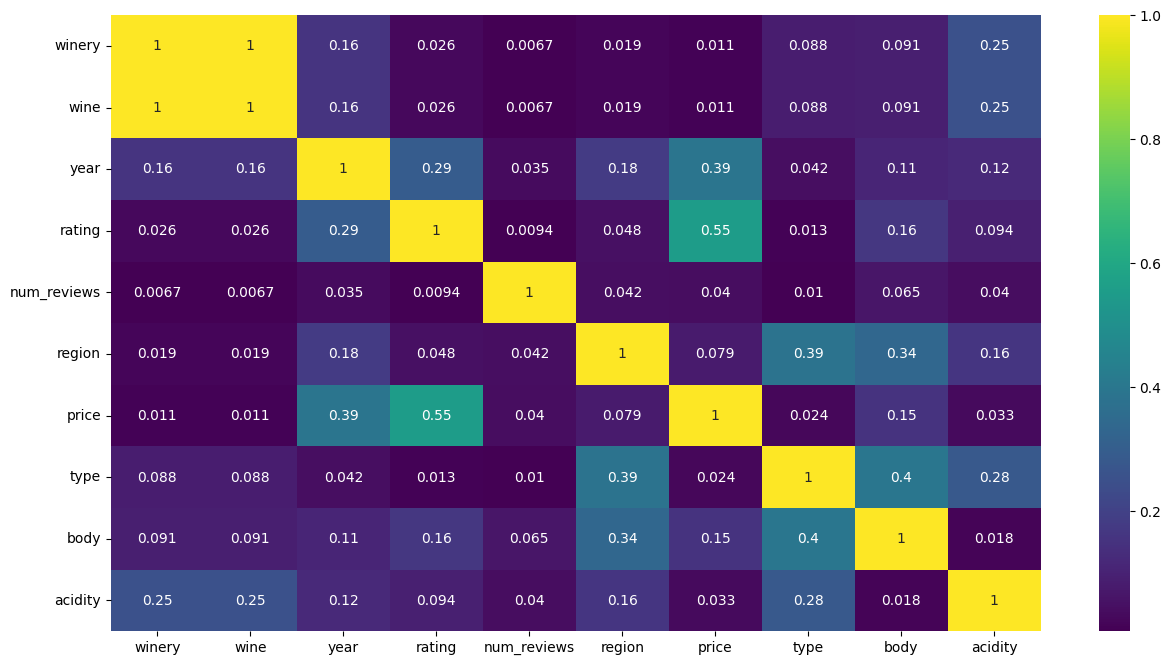

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(df_modified.corr().abs(), cmap='viridis', annot=True)

In [ ]:
df_modified = df_modified.drop(['winery'],axis=1)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wine         6329 non-null   object 
 1   year         6329 non-null   object 
 2   rating       6329 non-null   float64
 3   num_reviews  6329 non-null   int64  
 4   region       6329 non-null   object 
 5   price        6329 non-null   float64
 6   type         6329 non-null   object 
 7   body         6329 non-null   float64
 8   acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 494.5+ KB


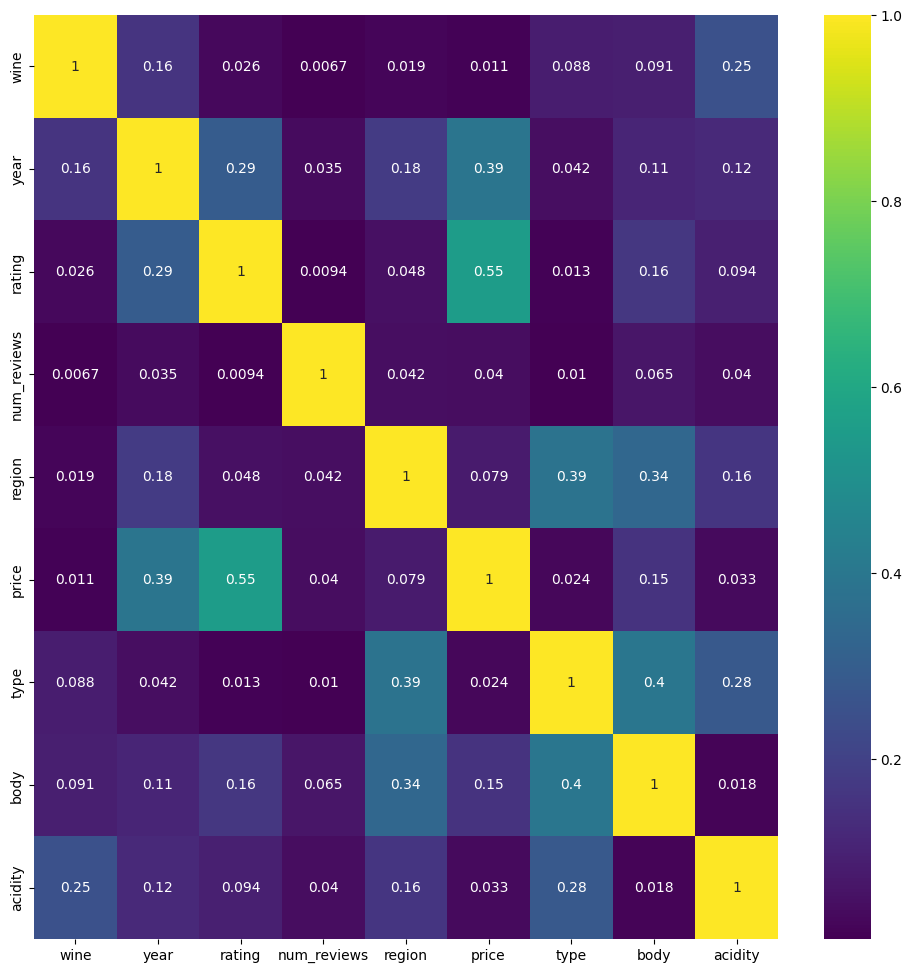

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df_modified.corr().abs(), cmap='viridis', annot=True)

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'num_reviews'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'body'}>],
       [<Axes: title={'center': 'acidity'}>, <Axes: >]], dtype=object)

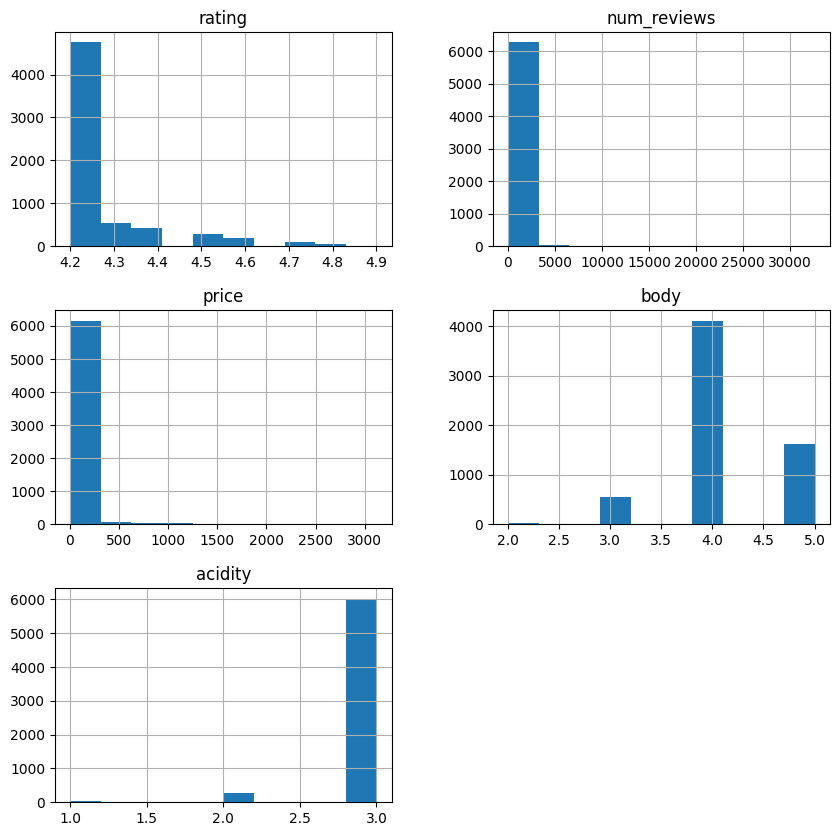

In [ ]:
df_modified.hist(figsize=(10,10))

In [ ]:
df_modified['price'].d

array([995.  , 313.5 , 324.95, ...,  16.76,  24.45,  31.63])

<Axes: ylabel='price'>

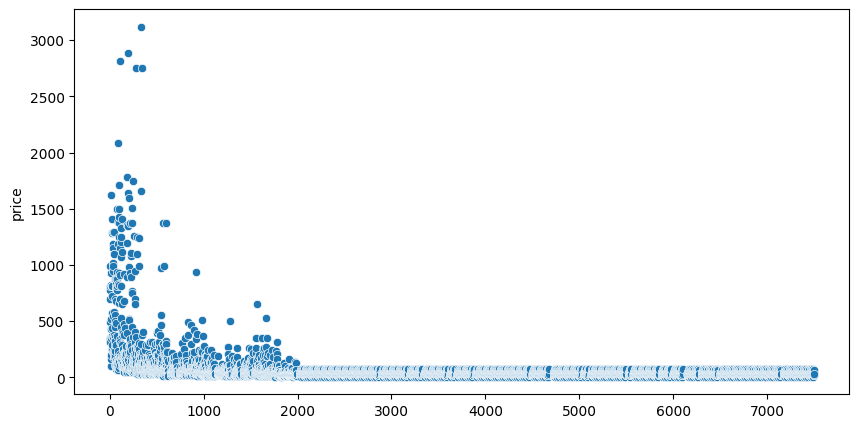

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_modified["price"])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
scaler = StandardScaler()
df_modified['price_scaled'] = scaler.fit_transform(df_modified[['price']])
df_modified

,wine,year,rating,num_reviews,region,price,type,body,acidity,price_scaled
0,421,61,4.9,58,69,995.00,19,5.0,3.0,5.715955
1,33,66,4.9,31,74,313.50,18,4.0,2.0,1.524357
2,446,57,4.8,1793,57,324.95,11,5.0,3.0,1.594781
3,446,47,4.8,1705,57,692.96,11,5.0,3.0,3.858244
4,446,44,4.8,1309,57,778.06,11,5.0,3.0,4.381656
...,...,...,...,...,...,...,...,...,...,...
7495,159,64,4.2,392,59,19.98,12,4.0,3.0,-0.280951
7496,158,66,4.2,390,53,16.76,9,4.0,3.0,-0.300756
7497,333,65,4.2,390,24,24.45,10,4.0,3.0,-0.253458
7498,315,59,4.2,389,57,64.50,11,5.0,3.0,-0.007129


In [ ]:
X = df_modified.drop(['price','price_scaled'], axis = 1)
y = df_modified['price_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

MAE: 0.3232243178126098
Значения при кросс-валидации(фолд = 3):
[-3.99969549 -1.65523063 -2.28440031]
